<a href="https://colab.research.google.com/github/DomenZero/Neuro_tests/blob/main/0_cats_and_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
SIZE = 224

In [ ]:
# Датасэт, название датасэтаб на какие части его делим (100% идет на тренировку нейросети)
train, _ = tfds.load('cats_vs_dogs', split=['train[:100%]'], with_info=True, as_supervised=True)
# 'image': Image(shape=(None, None, 3), dtype=tf.uint8), - 3 количество цветов (red, green, blue), None,None -разрешение (None может означать что картинки в разном ращрешении)
#  'train': 23262, - количество загруженных картинок
# 1738 corrupted images - поврежденные картинки

In [ ]:
# for img, label in train[0].take(10):
#   plt.figure()
#   plt.imshow(img)
#   print(label)

In [ ]:
def resize_image(img, label):
  img=tf.cast(img, tf.float32)
  img=tf.image.resize(img, (SIZE, SIZE)) # изменим на фиксированный размер
  img=img/255.0 # поделим значения пикселей в картинках, для удобства распознавания нейросети
  return img,label

In [ ]:
train_resized=train[0].map(resize_image) # применение функции к текущим изображениям
traing_batches=train_resized.shuffle(1000).batch(16) # разбить данные на части, чтобы поместить в память компьютера

In [ ]:
base_layers=tf.keras.applications.MobileNetV2(input_shape=(SIZE,SIZE,3), include_top=False)
base_layers.trainable=False

In [ ]:
# В model хранитсся нейросеть
# ts.keras.Seqential функция для последовательного объявления слоев
model = tf.keras.Sequential([
                             base_layers,
                             GlobalAveragePooling2D(), # уменьшает картинку и усредняет значения фич
                             Dropout(0.2), # 20% нейронов будут случайно выключаться нужно чтобы нейросеть пыталась найти общие фичи а не заучивала наизусть
                             Dense(1)
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
#  данные на которых обучаем, количество epoh - сколько раз пройдется нейросетка по данным
model.fit(traing_batches, epochs=1)

1454/1454 [==============================] - 796s 544ms/step - loss: 0.1079 - accuracy: 0.9548


In [52]:
files.upload()

Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg


{'2.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe1\x11XExif\x00\x00II*\x00\x08\x00\x00\x00\x02\x002\x01\x02\x00\x14\x00\x00\x00&\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00:\x00\x00\x00@\x00\x00\x002021:04:13 15:02:47\x00\x00\x00\x00\x00\x00\x00\x03\x00\x03\x01\x04\x00\x01\x00\x00\x00\x06\x00\x00\x00\x01\x02\x04\x00\x01\x00\x00\x00j\x00\x00\x00\x02\x02\x04\x00\x01\x00\x00\x00\xe6\x10\x00\x00\x00\x00\x00\x00\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc0\x00\x11\x08\x00Z\x00\xa0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\

In [ ]:
# # преобразования над изображением для приведения к общему виду
# img=load_img('1.jpg')
# img_array=img_to_array(img)
# img_resized, _ = resize_image(img_array, _)
# img_expended = np.expand_dims(img_resized, axis=0)
# model.predict(img_expended) # предскажет что же изображено

array([[2.4042308]], dtype=float32)

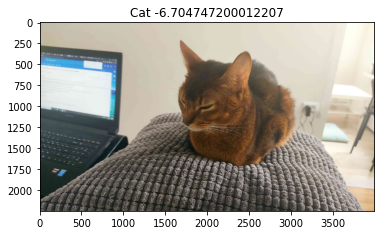

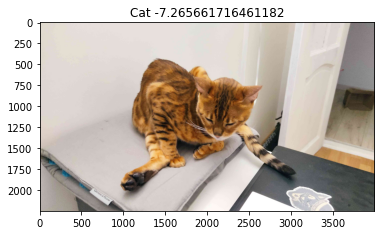

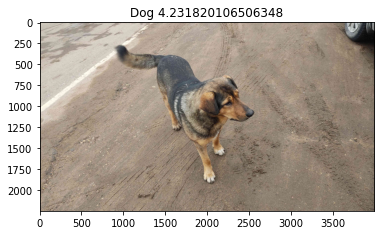

In [60]:
# для анализа многих изображений
for i in range(3):
  img=load_img("%s.jpg"%i)
  img_array=img_to_array(img)
  img_resized, _ = resize_image(img_array, _)
  img_expended = np.expand_dims(img_resized, axis=0)
  prediction=model.predict(img_expended)[0][0]
  pred_label='Cat' if prediction<0.5 else 'Dog'
  plt.figure()
  plt.imshow(img)
  plt.title(f'{pred_label} {prediction}')